In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
train_data = pd.read_csv("data/ratings_train.txt",header= 0, delimiter = "\t", quoting=3)
test_data = pd.read_csv("data/ratings_test.txt",header= 0, delimiter = "\t", quoting=3)
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


object
27.0


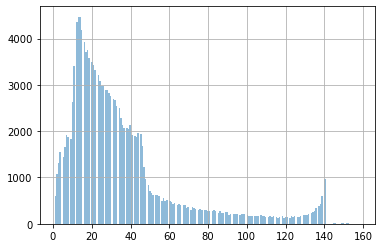

In [19]:
# 왜 str을 먼저 해줘야하는가 
# type이 없다.
print(train_data['document'].dtypes)
length = train_data['document'].astype(str).apply(len)
length.hist(bins = 200,alpha=0.5,label ='word')
print(np.percentile(length,50))

## 데이터 전처리


In [22]:
from konlpy.tag import Okt
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

In [23]:
train_data['document'][:10]

0                                  아 더빙.. 진짜 짜증나네요 목소리
1                    흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                        교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
5        막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.
6                                원작의 긴장감을 제대로 살려내지못했다.
7    별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...
8                               액션이 없는데도 재미 있는 몇안되는 영화
9        왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?
Name: document, dtype: object

In [64]:
def preprocessing(document):
    # 한글과 공백을 제외한 문자 제거
    stop_words= ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한']
    okt  = Okt()
    review = re.sub("[^가-힣ㄱ-하-ㅣ\\s]","",document)
#     print(review)
    #형태소 단위로 변경
    review = okt.morphs(review,stem =True) # 형태소 분석기를 사용해 어간 추출
#     print(review)

    review = [token for token in review if token not in stop_words]
    
    return review

from tqdm import tqdm
train_review ,test_review = [],[]
for review in tqdm(train_data['document']):
    if type(review)==str:
        train_review.append(preprocessing(review))
    else :
        train_review.append([])

for review in tqdm(test_data['document']):
    if type(review)==str:
        test_review.append(preprocessing(review))
    else :
        test_review.append([])


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [07:08<00:00, 116.69it/s]


## 토크나이징

In [66]:
tokenizer =  Tokenizer()
tokenizer.fit_on_texts(train_review)

train_sequences =  tokenizer.texts_to_sequences(train_review)
test_sequences =  tokenizer.texts_to_sequences(test_review)

word_vocab = tokenizer.word_index

max_length =27

train_inputs = pad_sequences(train_sequences,maxlen = max_length,padding='post')
train_labels = np.array(train_data['label'])
test_inputs = pad_sequences(test_sequences,maxlen = max_length, padding='post')
test_labels = np.array(test_data['label'])

In [71]:
data_configs = {}
data_configs['vocab']  = word_vocab
data_configs['vocab_size'] = len(word_vocab)+1

import os
import json
if not os.path.exists('data_in'):
    os.makedirs('data_in')
    
np.save(open('data_in/train_input.npy','wb'),train_inputs)
np.save(open('data_in/train_labels.npy','wb'),train_labels)
np.save(open('data_in/test_input.npy','wb'),test_inputs)
np.save(open('data_in/test_label.npy','wb'),test_labels)

json.dump(data_configs,open('data_in/data_configs.json','w'))

In [72]:
data_configs

{'vocab': {'영화': 1,
  '보다': 2,
  '하다': 3,
  '에': 4,
  '을': 5,
  '도': 6,
  '를': 7,
  '없다': 8,
  '이다': 9,
  '있다': 10,
  '좋다': 11,
  '너무': 12,
  '다': 13,
  '정말': 14,
  '재밌다': 15,
  '되다': 16,
  '적': 17,
  '만': 18,
  '같다': 19,
  '진짜': 20,
  '으로': 21,
  '로': 22,
  '아니다': 23,
  '않다': 24,
  '점': 25,
  '에서': 26,
  '만들다': 27,
  '과': 28,
  '나오다': 29,
  '연기': 30,
  '평점': 31,
  '최고': 32,
  '내': 33,
  '그': 34,
  '나': 35,
  '안': 36,
  '인': 37,
  '스토리': 38,
  '생각': 39,
  '못': 40,
  '왜': 41,
  '드라마': 42,
  '게': 43,
  '감동': 44,
  '사람': 45,
  '보고': 46,
  '이렇다': 47,
  '말': 48,
  '아깝다': 49,
  '고': 50,
  '더': 51,
  'ㅋㅋ': 52,
  '배우': 53,
  '때': 54,
  '와': 55,
  '재미있다': 56,
  '감독': 57,
  '거': 58,
  '그냥': 59,
  '요': 60,
  '재미': 61,
  '시간': 62,
  '내용': 63,
  '뭐': 64,
  '까지': 65,
  '중': 66,
  '주다': 67,
  '재미없다': 68,
  '자다': 69,
  '좀': 70,
  '쓰레기': 71,
  '하고': 72,
  '지루하다': 73,
  '네': 74,
  '가다': 75,
  '모르다': 76,
  '들다': 77,
  '그렇다': 78,
  '싶다': 79,
  '지': 80,
  '작품': 81,
  '사랑': 82,
  '알다': 83,
  '하나': 84,
  '다시

In [75]:
import tensorflow as tf
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [76]:

kargs = {
    'vocab_size' : data_configs['vocab_size'],
    'embedding_size' : 128,
    'num_filters' : 100,
    'dropout_rate' : 0.5,
    'hidden_dimension' : 250,
    'output_dimension' : 1
    
}

In [77]:
class CNN(tf.keras.Model):
    
    def __init__(self,**kargs):
        super(CNN,self).__init__()
        self.embedding = tf.keras.layers.Embedding(input_dim = kargs['vocab_size'],
                                            output_dim = kargs['embedding_size'])
        
        self.conv_list = [tf.keras.layers.Conv1D(filters = kargs['num_filters'],
                                       kernel_size = kernel_size,
                                       padding ='valid',
                                    activation = tf.keras.activations.relu,
                                        kernel_constraint = tf.keras.constraints.MaxNorm(max_value=3.)                                       
                                       )
                             for kernel_size in [3,4,5]]
        self.pooling = tf.keras.layers.GlobalMaxPool1D()
        self.dropout = tf.keras.layers.Dropout(kargs['dropout_rate'])
        self.fc1 = tf.keras.layers.Dense(units = kargs['hidden_dimension'],
                                        activation = tf.keras.activations.relu,
                                         # 가중치가 너무 커지는것을 방지
                                         kernel_constraint = tf.keras.constraints.MaxNorm(max_value = 3.)                                        
                                        )
        self.fc2 = tf.keras.layers.Dense(units=kargs['output_dimension'],
                                        activation = tf.keras.activations.sigmoid,
                                         kernel_constraint = tf.keras.constraints.MaxNorm(max_value=3.)
                                        )
    def call(self,x):
        x = self.embedding(x)
        x = self.dropout(x)
        x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list] , axis =1)
        x = self.fc1(x)
        x = self.fc2(x)
        
        return x

In [78]:

model = CNN(**kargs)
model.compile(optimizer = tf.keras.optimizers.Adam(1e-4),
             loss = tf.keras.losses.BinaryCrossentropy(),
              metrics= [tf.keras.metrics.BinaryAccuracy(name = "accuracy")]
             )

In [79]:
history = model.fit(train_inputs, train_labels, batch_size = 512, epochs =  10,
                    validation_split = 0.2 )

Train on 120000 samples, validate on 30000 samples
Epoch 1/10
120000/120000 [==============================] - 11s 95us/sample - loss: 0.6537 - accuracy: 0.6303 - val_loss: 0.5048 - val_accuracy: 0.7790
Epoch 2/10
120000/120000 [==============================] - 8s 68us/sample - loss: 0.4314 - accuracy: 0.8038 - val_loss: 0.3932 - val_accuracy: 0.8259
Epoch 3/10
120000/120000 [==============================] - 8s 70us/sample - loss: 0.3785 - accuracy: 0.8327 - val_loss: 0.3752 - val_accuracy: 0.8355
Epoch 4/10
120000/120000 [==============================] - 8s 69us/sample - loss: 0.3536 - accuracy: 0.8462 - val_loss: 0.3665 - val_accuracy: 0.8403
Epoch 5/10
120000/120000 [==============================] - 8s 69us/sample - loss: 0.3376 - accuracy: 0.8548 - val_loss: 0.3617 - val_accuracy: 0.8432
Epoch 6/10
120000/120000 [==============================] - 8s 69us/sample - loss: 0.3243 - accuracy: 0.8620 - val_loss: 0.3605 - val_accuracy: 0.8442
Epoch 7/10
120000/120000 [================

In [80]:
model.evaluate(test_inputs,test_labels)

50000/50000 [==============================] - 2s 47us/sample - loss: 0.3686 - accuracy: 0.8434


[0.368609626121521, 0.8434]